# NYC Taxi Analysis - Anomalies

This example shows you the basics of analyzing a real-world data set to identify anomalies.

## Data Overview
The data consists of the number of taxi passengers from 2014-07-01 to 2015-01-31. There are 5 known anomalies during these periods:

* NYC Marathon - 2014-11-02
* Thanksgiving - 2014-11-27
* Christmas - 2014-12-25
* New Years - 2015-01-01
* Snow Blizzard - 2015-01-26 and 2015-01-27

In [1]:
import matrixprofile as mp

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
taxi = mp.datasets.load('nyc-taxi-anomalies')
ts = taxi['data']

## Analyze

This is a quick way to get an understanding of your data at hand. The analyze function takes your time series and identifies an upper window when no windows are supplied. The upper window is based on a default cross correlation threshold of 0.98. Essentially, a matrix profile is computed for each window until the threshold is no longer met.

/home/tyler/src/matrixprofile/matrixprofile/visualize.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


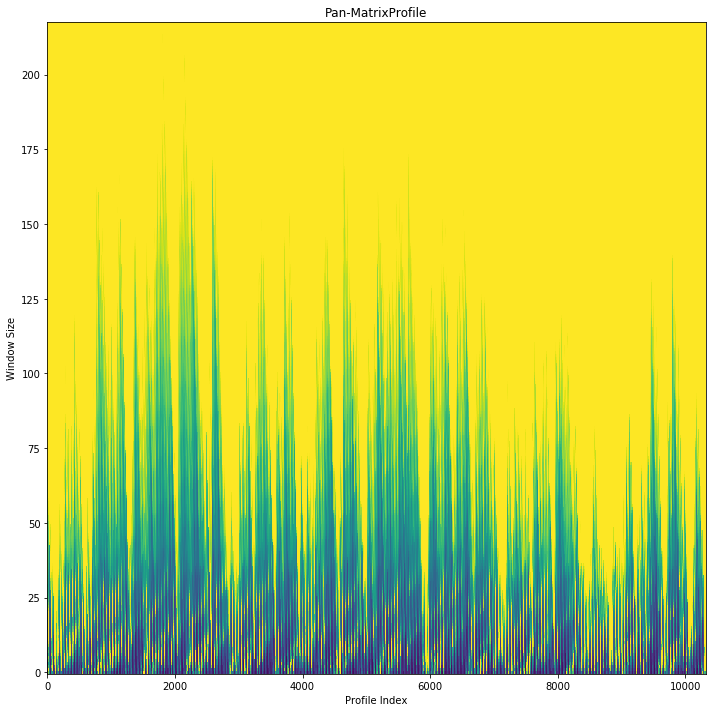

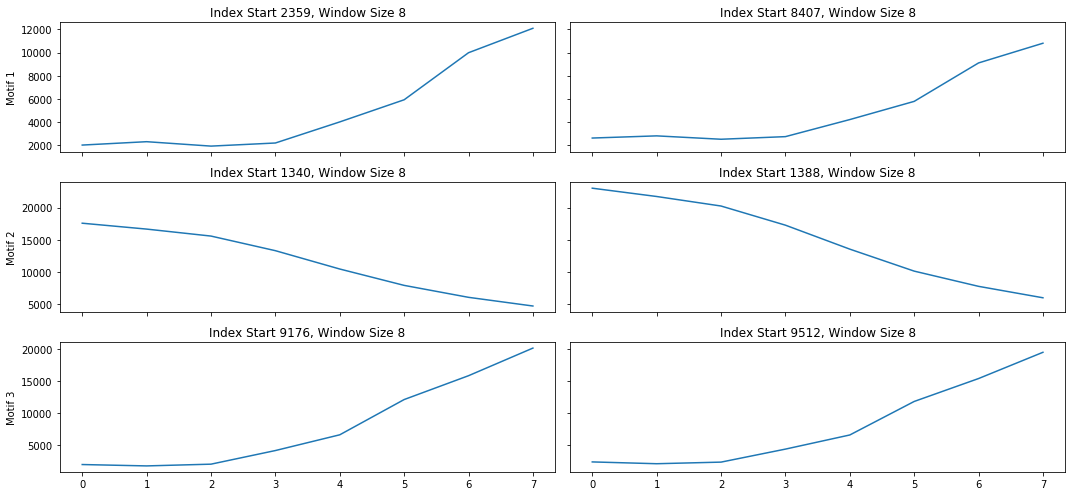

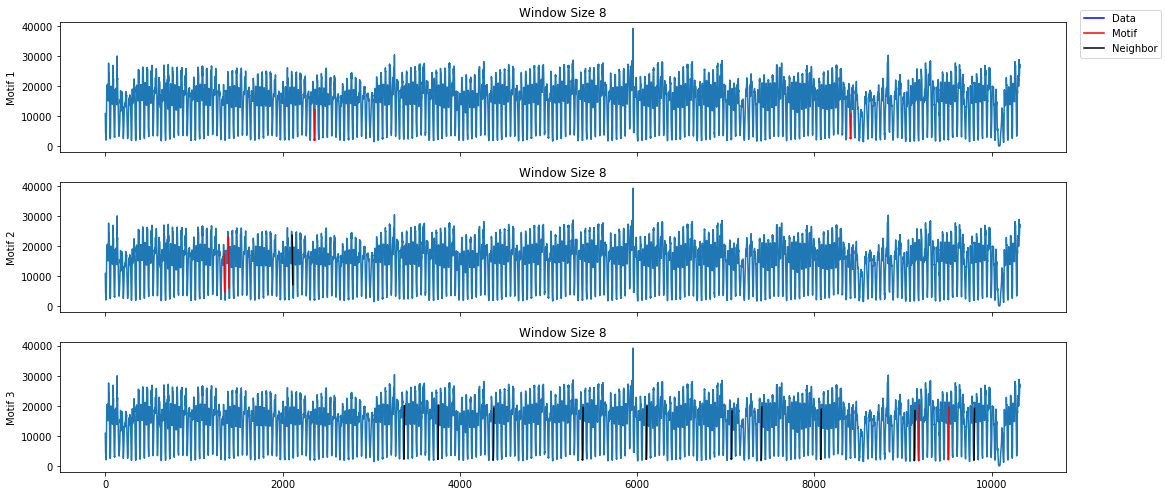

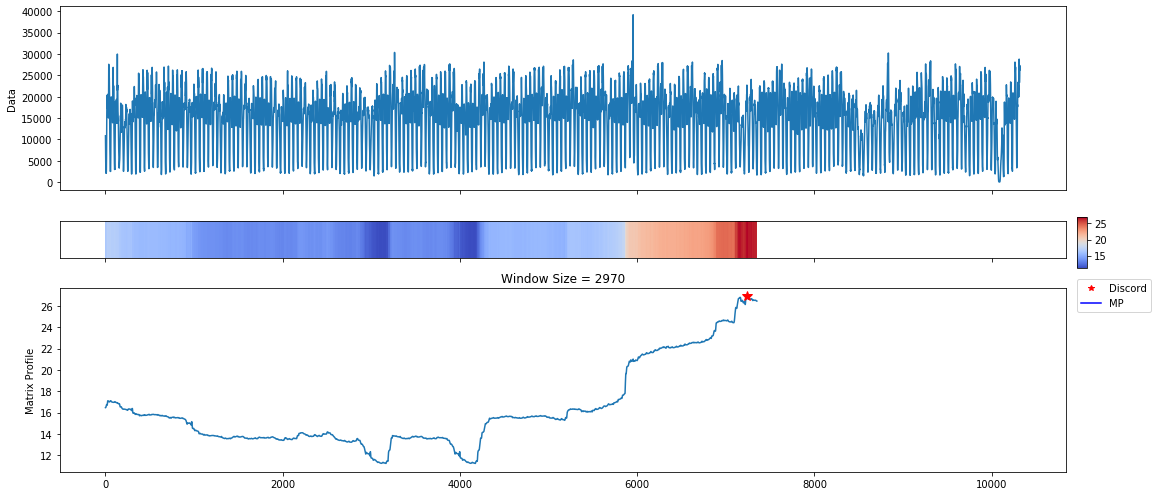

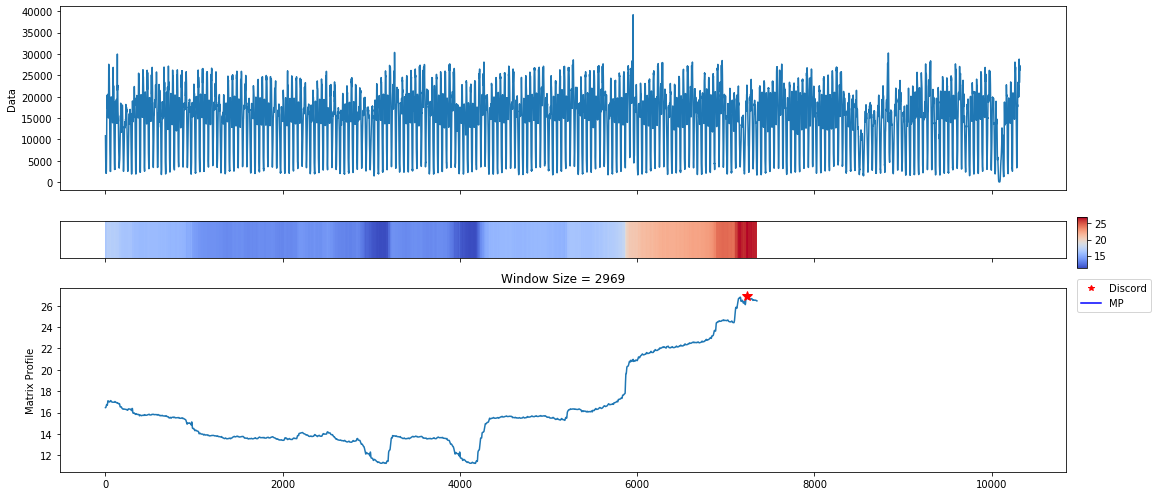

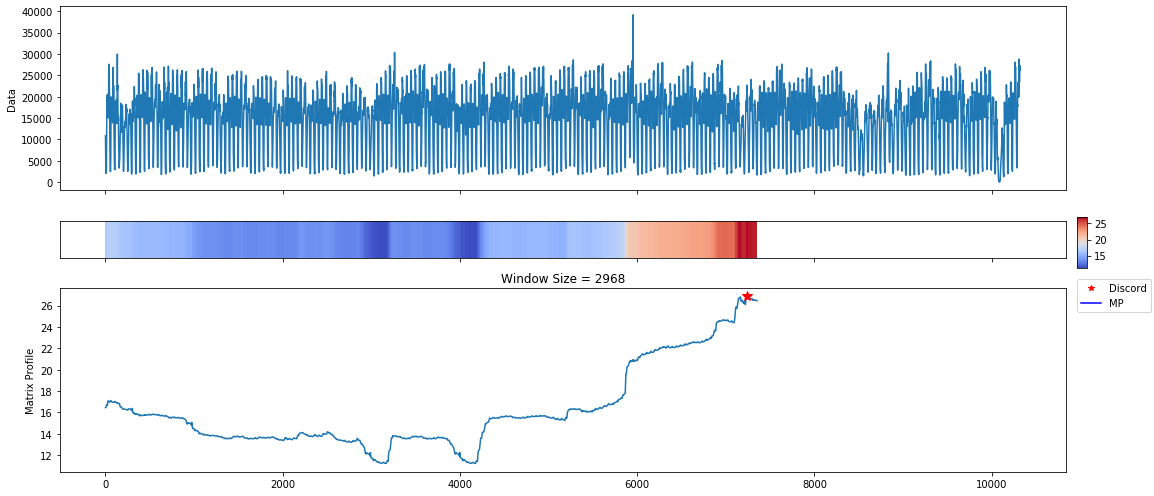

In [3]:
# run analyze on all cpu cores
profile, figures = mp.analyze(ts, n_jobs=-1)

The first plot is useful when trying to spot repeated patterns in the data. The repeated patterns in this data set occur in short spurts. Interesting motifs were found at the 4 hour interval. This makes sense due to various patterns in taxi needs throughout the day. However, this data set is most meaningful when identifying anomalies.

The discord plots show an anomaly towards the end of the series with a window size of about 2 months. This is actually where the majority of the anomalies are annotated within this data set. The plot is reporting all of these as one anomaly due to the window size. The discord algorithm finds the maximal distance across all window sizes when a Pan-MatrixProfile is provided.

If you know your data well enough, it may make sense to start off with specific window sizes. In the next section, we compute the analyze the MatrixProfile over a daily window.

## Daily Analysis

With the Pan-MatrixProfile computed, we can easily pick it apart and look at specific window sizes. For example, lets look at a daily window size.

Note that if you do not have the MatrixProfile computed for the given window size it will need to be computed. You can do this by using the following:

```python
profile = mp.compute(ts, window_size)
```

In [4]:
daily_window = 48 # note that our interval is in 30 minutes
daily_profile = mp.utils.pick_mp(profile, daily_window)

# find discords using a weekly exclusion zone
daily_profile = mp.discover.discords(daily_profile, k=5, exclusion_zone=daily_window*7)

/home/tyler/src/matrixprofile/matrixprofile/visualize.py:262: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


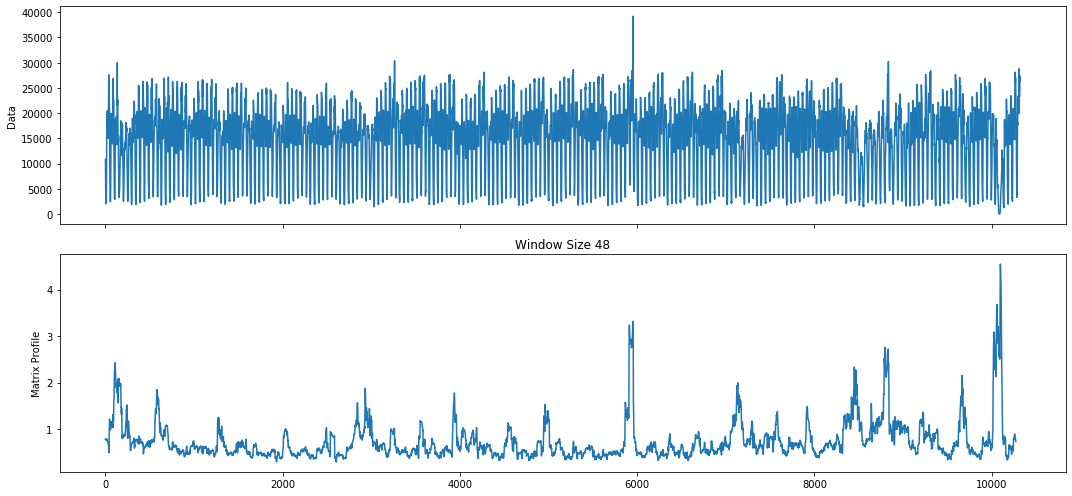

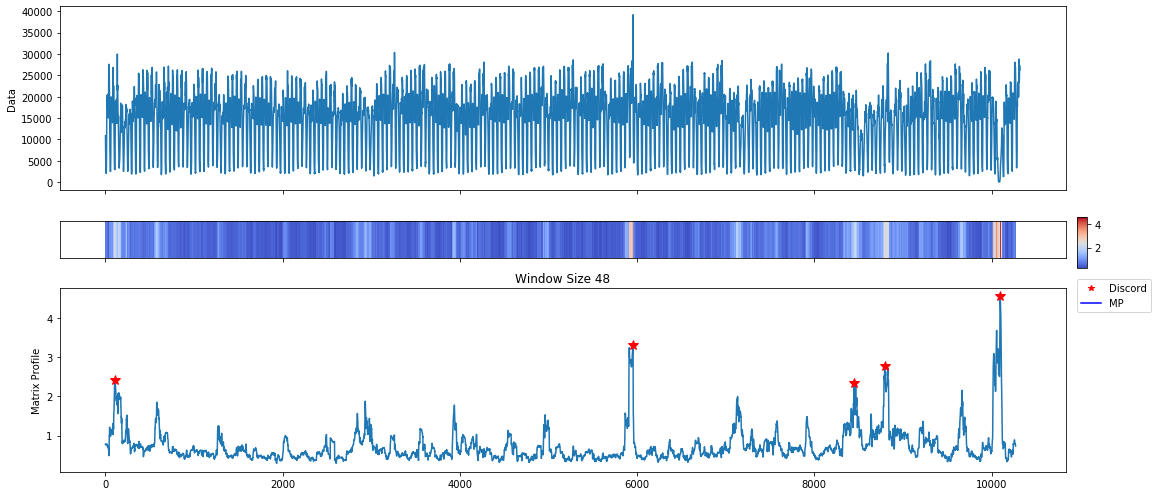

In [5]:
figures = mp.visualize(daily_profile)

With a daily window size and exclusion zone set to a week, we have found results that are a little easier to digest. The internal visualization tool is not aware of the time dimension. We can use the discord indices to figure out these dates or plot it ourselves.

In [6]:
taxi['datetime'][daily_profile['discords']]

array(['2015-01-27T09:00:00', '2014-11-02T00:30:00',
       '2014-12-31T05:30:00', '2014-07-03T07:00:00',
       '2014-12-24T00:30:00'], dtype='datetime64[s]')

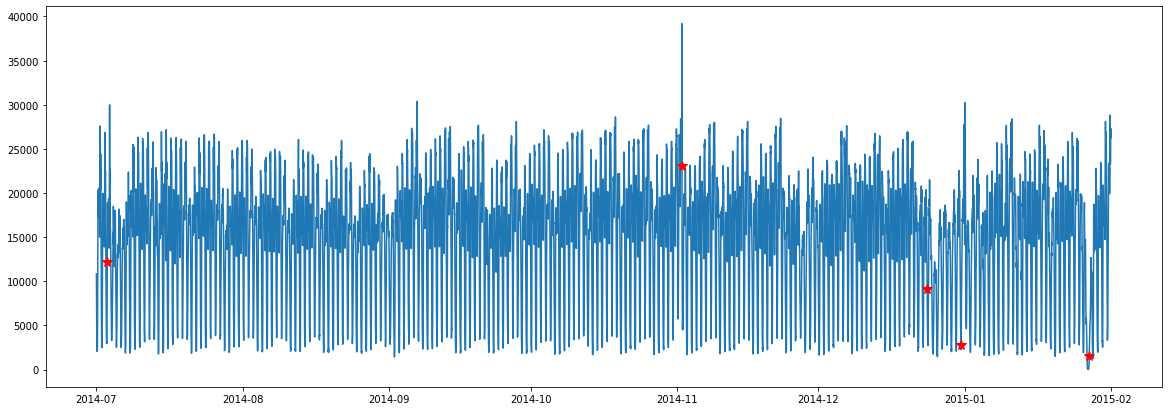

In [7]:
plt.figure(figsize=(20, 7))
plt.plot(taxi['datetime'], taxi['data'])
for discord in daily_profile['discords']:
    dt = taxi['datetime'][discord]
    val = taxi['data'][discord]
    plt.plot(dt, val, c='r', marker='*', markersize=10)

The red stars plotted on the data represent anomalous locations. From the description of the data, these anomalies are very close to the claims.